In [1]:
import numpy as np
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image

In [2]:
def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result


In [3]:
# 저장한 리뷰 정보 불러오기
df = pd.read_csv('./review_dataset.csv', encoding = 'utf-8-sig')
df = df.drop(['Unnamed: 0'], axis = 1) # 불필요한 칼럼 삭제
df

,id,date,dateYear,dateMonth,dateDay,rating,userName,content
0,1,20200414,2020,4,14,4,Google 사용자,평소에 생각하지 않고 먹었던 음식을 신호등 색깔로 표시해서 덜먹여야하고 더먹어도 좋...
1,2,20220920,2022,9,20,4,daldal,"눔에서 제공하는 식단 기록이나 코치님과의 소통, 피드백 등은 굉장히 만족스럽습니다...."
2,3,20220902,2022,9,2,4,나현지,전체적인 기능과 추구하는 식단 방향 모두 건강한 식습관 형성으로 매우 만족스럽지만 ...
3,4,20220811,2022,8,11,3,Jina.H,앱이 일단 좋게말하면 심플하고 나쁘게 말하면 뭐가 없고 한눈에 점검이 안됩니다.. ...
4,5,20221019,2022,10,19,1,S.Y. JANG,로그인 진행중에 화면이 하얗게 바뀌고 멈춤현상이 지속됩니다. 이거때문에 메일보내도 ...
...,...,...,...,...,...,...,...,...
5995,5996,20140308,2014,3,8,3,Google 사용자,개굿
5996,5997,20140309,2014,3,9,4,Google 사용자,개굿
5997,5998,20140311,2014,3,11,3,Google 사용자,개굿
5998,5999,20140312,2014,3,12,4,Google 사용자,개굿


In [4]:
# 가장 최신의 500개 리뷰 추출
df_set = df.sort_values(by = ['date'], ascending=False).head(500).reset_index(drop=True)

<AxesSubplot:>

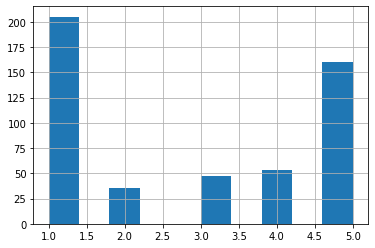

In [5]:
df_set['rating'].hist()

<AxesSubplot:>

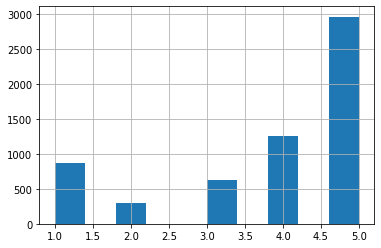

In [6]:
# 전체로 보았을때는 5점이 많으나 최신의 댓글 기준으로 보았을때는 부정적인 댓글이 많음
df['rating'].hist()

In [7]:
okt = Okt()

df_set["nouns"] = df_set["content"].apply(okt.nouns)

In [8]:
df_set.head()

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,nouns
0,1429,20221031,2022,10,31,5,Yerim Ko,건강관리 케어 잘 받았습니다,"[건강, 관리, 케어]"
1,49,20221023,2022,10,23,5,이수정,식단개선이 많이 되고 있어요 동기부여도 되고 돈 안아까워요,"[식단, 개선, 동기부여, 돈]"
2,5,20221019,2022,10,19,1,S.Y. JANG,로그인 진행중에 화면이 하얗게 바뀌고 멈춤현상이 지속됩니다. 이거때문에 메일보내도 ...,"[로그인, 진행중, 화면, 현상, 지속, 거, 때문, 메일, 답장, 다시, 다운]"
3,926,20221017,2022,10,17,1,안승민,아무 도움이 안됨,"[아무, 도움]"
4,6,20221017,2022,10,17,4,힐링아무,혼자서 식단관리와 체중감량 힘들어서 다이어트 어플 찾다가 눔 하게 됐어요. 영양심리...,"[혼자, 식단, 관리, 체중감량, 다이어트, 어플, 눔, 심리, 전문, 코치, 맞춤..."


In [9]:
df_set['positive_yn'] = np.where(df_set['rating'] >= 3, 1, 0)

In [10]:
df_set.head()

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,nouns,positive_yn
0,1429,20221031,2022,10,31,5,Yerim Ko,건강관리 케어 잘 받았습니다,"[건강, 관리, 케어]",1
1,49,20221023,2022,10,23,5,이수정,식단개선이 많이 되고 있어요 동기부여도 되고 돈 안아까워요,"[식단, 개선, 동기부여, 돈]",1
2,5,20221019,2022,10,19,1,S.Y. JANG,로그인 진행중에 화면이 하얗게 바뀌고 멈춤현상이 지속됩니다. 이거때문에 메일보내도 ...,"[로그인, 진행중, 화면, 현상, 지속, 거, 때문, 메일, 답장, 다시, 다운]",0
3,926,20221017,2022,10,17,1,안승민,아무 도움이 안됨,"[아무, 도움]",0
4,6,20221017,2022,10,17,4,힐링아무,혼자서 식단관리와 체중감량 힘들어서 다이어트 어플 찾다가 눔 하게 됐어요. 영양심리...,"[혼자, 식단, 관리, 체중감량, 다이어트, 어플, 눔, 심리, 전문, 코치, 맞춤...",1


In [11]:
positive_noun = df_set.loc[df_set['positive_yn']==1, 'nouns']
negative_noun = df_set.loc[df_set['positive_yn']==0, 'nouns']

In [12]:
import itertools

totwords_positive = list(itertools.chain(*positive_noun.to_list()))
totwords_negative = list(itertools.chain(*negative_noun.to_list()))

In [13]:
words_positive = [n for n in totwords_positive if len(totwords_positive) > 1] # 단어의 길이가 1개인 것은 제외
words_negative = [n for n in totwords_negative if len(totwords_negative) > 1] # 단어의 길이가 1개인 것은 제외

In [14]:
c_positive = Counter(words_positive) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
c_negative = Counter(words_negative) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

In [15]:
import os
FONT_PATH = os.environ.get("FONT_PATH", "/System/Library/Fonts/AppleSDGothicNeo.ttc")

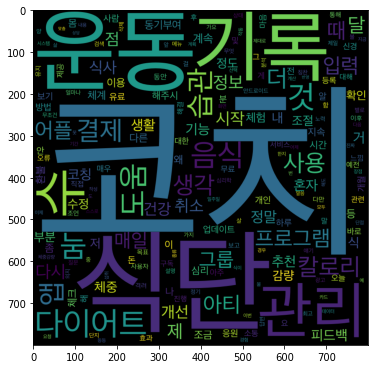

In [16]:
wc = WordCloud(font_path=FONT_PATH, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c_positive)
# plt.figure()
plt.figure(figsize=(6,8))
plt.imshow(gen)

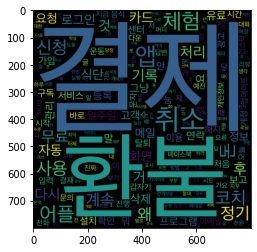

In [17]:
wc = WordCloud(font_path=FONT_PATH, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c_negative)
plt.figure()
plt.imshow(gen)

In [31]:
[x for x in df_set.loc[df_set['positive_yn']==0, 'nouns'] if '코치' in x]

[['그냥',
  '기록',
  '어플',
  '바',
  '코치',
  '일도',
  '달',
  '사용',
  '기록',
  '어플',
  '굳이',
  '가까이',
  '좀',
  '환불',
  '신청',
  '처음',
  '시작',
  '설명',
  '대뜸',
  '결제',
  '요구',
  '기록',
  '걸',
  '굳이',
  '이',
  '다이어트',
  '약',
  '한가지',
  '장점',
  '나',
  '칼로리',
  '몇',
  '기록',
  '얼마',
  '점',
  '다이어트',
  '조언',
  '다른',
  '낫',
  '값어치',
  '코치',
  '비용',
  '건가',
  '코치',
  '막',
  '채찍',
  '조언',
  '정도',
  '그거',
  '어플',
  '나',
  '효과',
  '환불',
  '방법',
  '전화',
  '어플',
  '가지',
  '방법',
  '어플',
  '본사',
  '미국',
  '런가',
  '메뉴',
  '거의',
  '전화',
  '신청',
  '환불',
  '가입',
  '탈퇴',
  '움'],
 ['장점',
  '결제',
  '코치',
  '대화',
  '수',
  '그룹',
  '활동',
  '격려',
  '수',
  '단점',
  '코치',
  '하루',
  '메세지',
  '평균',
  '건',
  '답장',
  '사실',
  '가격',
  '값',
  '음식',
  '기록',
  '부족함',
  '음식',
  '내',
  '음식',
  '영양성분',
  '제대로',
  '수',
  '불',
  '편',
  '함',
  '단',
  '탄수',
  '식이섬유',
  '당류',
  '등',
  '영양성분',
  '과',
  '로',
  '알',
  '수도',
  '총',
  '칼로리',
  '음식',
  '빨강',
  '노랑',
  '초록',
  '음식',
  '강박',
  '것',
  '예시',
  '아몬드',
  '렌즈콩',
  '최대한',
  '피해',
  '빨강',

In [19]:
df_set.loc[df_set['positive_yn']==1, :]

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,nouns,positive_yn
0,1429,20221031,2022,10,31,5,Yerim Ko,건강관리 케어 잘 받았습니다,"[건강, 관리, 케어]",1
1,49,20221023,2022,10,23,5,이수정,식단개선이 많이 되고 있어요 동기부여도 되고 돈 안아까워요,"[식단, 개선, 동기부여, 돈]",1
4,6,20221017,2022,10,17,4,힐링아무,혼자서 식단관리와 체중감량 힘들어서 다이어트 어플 찾다가 눔 하게 됐어요. 영양심리...,"[혼자, 식단, 관리, 체중감량, 다이어트, 어플, 눔, 심리, 전문, 코치, 맞춤...",1
6,342,20220926,2022,9,26,5,이상우,체계적으로. 꾸준히 관리가 되네요,"[체계, 관리]",1
8,2,20220920,2022,9,20,4,daldal,"눔에서 제공하는 식단 기록이나 코치님과의 소통, 피드백 등은 굉장히 만족스럽습니다....","[눔, 제공, 식단, 기록, 코치, 소통, 피드백, 등, 다만, 운동, 기록, 당일...",1
...,...,...,...,...,...,...,...,...,...,...
494,522,20210126,2021,1,26,5,HYESUN PARK,4개월 여정 함께하였어요!^^ 식단관리 과학적으로 체계적으로 하기 좋습니다. 전문 ...,"[개월, 여정, 식단, 관리, 과학, 체계, 전문, 지식, 추천]",1
496,1104,20210126,2021,1,26,5,시베리아횡단보도,10년 넘게 제자리를 지켜온 허벅지살. 지방흡입하기 전에 마지막이라는 생각으로 해봤...,"[제자리, 온, 허벅지, 살, 지방, 흡입, 전, 마지막, 생각, 식이요법, 살, ...",1
497,571,20210126,2021,1,26,5,ALPHA Q Inc.,새로운 습관이 생기게 해주었어요 채식 위주의 식단 니트운동 등.. 건강을 생각하는 ...,"[습관, 생기, 채식, 위주, 식단, 니트, 운동, 등, 건강, 생각, 습관, 눔앱...",1
498,464,20210126,2021,1,26,5,원성희,16주 프로그램을 두번이나 재구매 했어요. 식단관리 꾸준히 할 수 있고 코치님의 긍...,"[주, 프로그램, 번, 식단, 관리, 수, 코치, 긍정, 코칭, 관리, 유지]",1


In [20]:
words_positive_cnt = pd.DataFrame(columns =['word'], data = words_positive)
words_negative_cnt = pd.DataFrame(columns =['word'], data = words_negative)

In [21]:
words_positive_cnt_norm = words_positive_cnt.value_counts(normalize=True).to_frame().reset_index()
words_negative_cnt_norm = words_negative_cnt.value_counts(normalize=True).to_frame().reset_index()

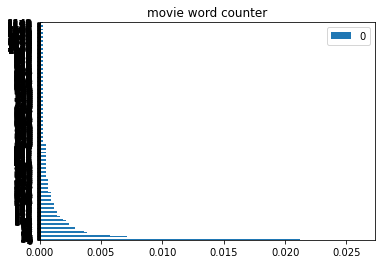

<Figure size 1440x1440 with 0 Axes>

In [22]:
# 빈도수 시각화하기
words_positive_cnt_norm.plot(kind='barh',title='movie word counter')
plt.figure(figsize=(20,20))
# # 내림차순 정렬
# words_positive_cnt_norm.sort_values().plot(kind='barh',title='movie word counter')
plt.show()

In [23]:
words_positive_cnt_norm = words_positive_cnt_norm.rename(columns = {0:'percentage'})
words_negative_cnt_norm = words_negative_cnt_norm.rename(columns = {0:'percentage'})

In [27]:
words_positive_cnt_norm.sort_values(by =['percentage'], ascending=False).head(10)

,word,percentage
0,코치,0.025983
1,식단,0.021216
2,운동,0.019309
3,기록,0.017878
4,관리,0.017640
5,수,0.014779
6,다이어트,0.014303
7,것,0.013826
8,눔,0.013111
9,도움,0.012872


In [26]:
words_negative_cnt_norm.sort_values(by =['percentage'], ascending=False).head(10)

,word,percentage
0,결제,0.051560
1,환불,0.027408
2,취소,0.027137
3,앱,0.018996
4,체험,0.014111
5,어플,0.011669
6,돈,0.010041
7,코치,0.009227
8,신청,0.009227
9,사용,0.008955


In [50]:
# [x for x in df_set.loc[df_set['positive_yn']==0, 'nouns'] if '코치' in x]
def get_coach_index(row):
    print(row)
    

In [57]:
df_set['coach_yn'] = df_set['nouns'].apply(lambda x : 1 if '코치' in x else 0)

In [63]:
df_set[(df_set['coach_yn']==1)&(df_set['positive_yn']==0)].sort_values(by = ['date'])

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,nouns,positive_yn,coach_yn
458,378,20210209,2021,2,9,1,xx x,별롭니다... 체계적인 관리가 안되요.. 밑에 매크로처럼 코칭메시지 붙여넣는다는 말...,"[별롭니, 체계, 관리, 밑, 매크로, 코칭, 메시지, 말, 공감, 관리, 의, 느...",0,1
449,739,20210217,2021,2,17,1,신동호,그룹도 매칭 안된체 물어보기 전까지 방치되고 코치와 연락도 4시간에 한번정도 됨. ...,"[그룹, 매칭, 체, 전, 방치, 코치, 연락, 한번, 정도, 코치, 오전, 생각,...",0,1
431,141,20210304,2021,3,4,1,임연경,식단기록에 없는 음식이 많아서 기록하는데 불편합니다.더 많은 음식을 업데이트 해야 ...,"[식단, 기록, 음식, 기록, 더, 음식, 업데이트, 것, 돈, 음식, 칼로리, 기...",0,1
421,740,20210315,2021,3,15,1,스마일,아니! 일주일동안 체험해보래서 보려고했는데 왜 이틀밖에 안됬는데 벌써 프로그램 결정...,"[일주일, 동안, 체험, 래서, 왜, 이틀, 벌써, 프로그램, 결정, 코치, 나라,...",0,1
417,374,20210317,2021,3,17,1,eereh,코치분은 채팅으로 회원을 관리해야 하는데 시간 정해두고 매크로 같은 말만 올려요. ...,"[코치, 채팅, 회원, 관리, 시간, 정해, 매크로, 말, 쪽, 것, 답, 제대로,...",0,1
412,1405,20210318,2021,3,18,1,Jungeun Park,코치가 계정변경알려준다니 제프로그램을 취소시켜버렸네요..제정신인가요? 너무 어이가없...,"[코치, 계정, 변경, 프로그램, 취소, 정신, 어이, 말, 코치, 교육, 수준, ...",0,1
406,1393,20210323,2021,3,23,1,Jay Yu,아...광고에선 안 이랬잖소..1:1 코칭이라면서요.. 생활패턴이 바뀌엇다면서요.....,"[광고, 안, 코칭, 면서, 생활, 패턴, 면서, 코치, 내, 말, 안, 말, 답변...",0,1
370,596,20210410,2021,4,10,1,bo bo,코치 전혀 안되고 유료 서비스도 최악. 답변은 4~5시간 기다림은 기본 코치라는 사...,"[코치, 전혀, 유료, 서비스, 최악, 답변, 기다림, 기본, 코치, 사람, 능력,...",0,1
363,730,20210412,2021,4,12,1,박소희,1주일 체험 신청하고 결제 후 식사 1끼 등록 후엔 채팅에 코치 답글도 보이지 않더...,"[주일, 체험, 신청, 결제, 후, 식사, 끼, 등록, 후, 채팅, 코치, 답글, ...",0,1
339,471,20210420,2021,4,20,2,이한슬,일주일 체험 후 괜찮으면 정기 결제도 해보려고 했는데 코치님 답변이 하루에 두번 혹...,"[일주일, 체험, 후, 정기, 결제, 코치, 답변, 하루, 번, 한번, 인원, 관리...",0,1


In [62]:
df_set[(df_set['coach_yn']==1)&(df_set['positive_yn']==1)]

,id,date,dateYear,dateMonth,dateDay,rating,userName,content,nouns,positive_yn,coach_yn
4,6,20221017,2022,10,17,4,힐링아무,혼자서 식단관리와 체중감량 힘들어서 다이어트 어플 찾다가 눔 하게 됐어요. 영양심리...,"[혼자, 식단, 관리, 체중감량, 다이어트, 어플, 눔, 심리, 전문, 코치, 맞춤...",1,1
8,2,20220920,2022,9,20,4,daldal,"눔에서 제공하는 식단 기록이나 코치님과의 소통, 피드백 등은 굉장히 만족스럽습니다....","[눔, 제공, 식단, 기록, 코치, 소통, 피드백, 등, 다만, 운동, 기록, 당일...",1,1
15,4,20220811,2022,8,11,3,Jina.H,앱이 일단 좋게말하면 심플하고 나쁘게 말하면 뭐가 없고 한눈에 점검이 안됩니다.. ...,"[앱, 일단, 말, 심플, 말, 뭐, 한눈, 점검, 이번, 주, 이번, 달, 며칠,...",1,1
21,7,20220718,2022,7,18,5,빽근,눔에서 제공해주는 서비스는 만족스럽게 사용중. 계속 사용할 예정. 식단기록도 편하고...,"[눔, 제공, 서비스, 만족, 사용, 계속, 사용, 예정, 식단, 기록, 사용, 디...",1,1
40,171,20220615,2022,6,15,5,Daru San,친절하시고 체계적입니다. 개인적으로는 정말 훌륭하다고 생각합니다. 눔코치진 고마워요...,"[체계, 개인, 정말, 생각, 눔, 코치, 진, 전, 코치, 아티, 니드]",1,1
...,...,...,...,...,...,...,...,...,...,...,...
488,293,20210129,2021,1,29,4,jiheon lee,식단관리를 체계적으로 하고 효과적인 운동과 다이어트관련 심리학적인 아티클 보내주면서...,"[식단, 관리, 체계, 효과, 운동, 다이어트, 관련, 심리학, 아티, 다이어트, ...",1,1
490,454,20210128,2021,1,28,5,hoasook,심리적효과와 과학적인 데이터로 음식선택이나 욕구를 자연스럽게 습관들여가며 코치님들의...,"[심리, 효과, 과학, 데이터, 음식, 선택, 욕구, 자연, 습관, 여가, 코치, ...",1,1
492,1331,20210127,2021,1,27,5,s p,눔코치님들 감사드립니다. 눔이 건강바이블 이라면 코치님들은 수호천사였어요. 더욱 건...,"[눔, 코치, 감사, 눔, 건강, 바이블, 라면, 코치, 수호천사, 더욱, 생활, ...",1,1
496,1104,20210126,2021,1,26,5,시베리아횡단보도,10년 넘게 제자리를 지켜온 허벅지살. 지방흡입하기 전에 마지막이라는 생각으로 해봤...,"[제자리, 온, 허벅지, 살, 지방, 흡입, 전, 마지막, 생각, 식이요법, 살, ...",1,1


In [64]:
df_set[(df_set['coach_yn']==1)].to_csv('./chk_review.csv', encoding = 'utf-8-sig') # csv 파일로 저장